In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
data = pd.read_csv('sample_data/Steam_games.csv')
data.head()

,Name,rel_date,sale_price,discounted_price
0,Counter-Strike: Global Offensive,08-21-2012,14.99,NaN
1,PLAYERUNKNOWN'S BATTLEGROUNDS,03-23-2017,29.99,NaN
2,Outlast 2,04-24-2017,29.99,NaN
3,SMITE,09-8-2015,0.00,NaN
4,Rocket League,07-6-2015,19.99,NaN


In [7]:
data.shape

(13600, 4)

In [8]:
data.isnull().sum()

Name                    0
rel_date                0
sale_price              0
discounted_price    10197
dtype: int64

In [9]:
data.dropna(axis=0, inplace=True)
data.isnull().sum()

Name                0
rel_date            0
sale_price          0
discounted_price    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 5 to 13598
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              3403 non-null   object 
 1   rel_date          3403 non-null   object 
 2   sale_price        3403 non-null   float64
 3   discounted_price  3403 non-null   float64
dtypes: float64(2), object(2)
memory usage: 132.9+ KB


In [15]:
data.rename(columns = {"rel_date": "date"}, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 5 to 13598
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              3403 non-null   object 
 1   date              3403 non-null   object 
 2   sale_price        3403 non-null   float64
 3   discounted_price  3403 non-null   float64
dtypes: float64(2), object(2)
memory usage: 132.9+ KB


In [17]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
data['date']

5       2017-04-25
7       2014-09-22
10      2015-06-23
15      2012-09-07
16      2013-10-23
           ...    
13594   2017-04-21
13595   2016-11-15
13596   2008-10-10
13597   2012-06-22
13598   2014-11-11
Name: date, Length: 3403, dtype: datetime64[ns]

In [19]:
data['year'] = data['date'].apply(lambda date:date.year)
data['month'] = data['date'].apply(lambda date: date.month)

In [20]:
data.head()

,Name,date,sale_price,discounted_price,year,month
5,BlazBlue Centralfiction,2017-04-25,39.99,35.99,2017,4
7,The Long Dark,2014-09-22,19.99,9.99,2014,9
10,Batman : Arkham Knight,2015-06-23,19.99,7.99,2015,6
15,Batman: Arkham City - Game of the Year Edition,2012-09-07,19.99,4.99,2012,9
16,Space Engineers,2013-10-23,24.99,7.49,2013,10


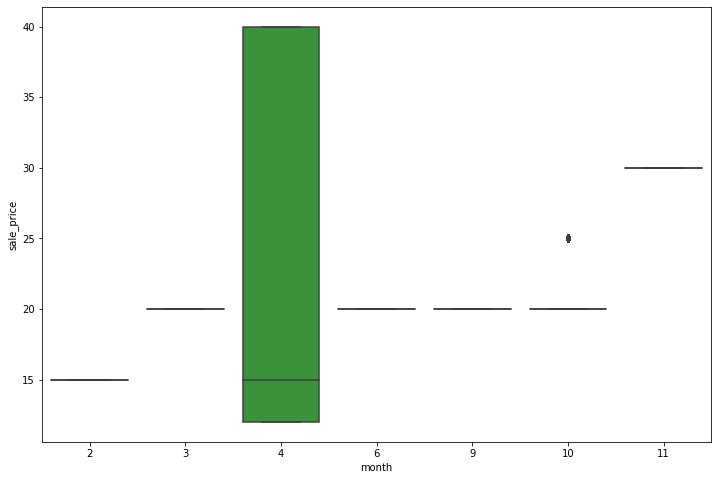

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='sale_price', data=data)
plt.show()

In [24]:
data['month'].value_counts()

10    618
4     609
9     544
6     544
11    544
3     272
2     272
Name: month, dtype: int64

<Figure size 720x432 with 0 Axes>

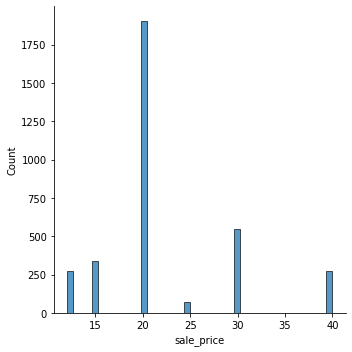

In [26]:
plt.figure(figsize=(10,6))
sns.displot(data['sale_price'])
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 5 to 13598
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              3403 non-null   object        
 1   date              3403 non-null   datetime64[ns]
 2   sale_price        3403 non-null   float64       
 3   discounted_price  3403 non-null   float64       
 4   year              3403 non-null   int64         
 5   month             3403 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 315.1+ KB


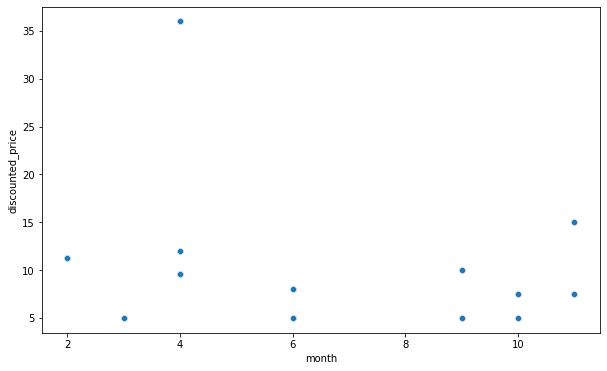

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='month', y='discounted_price', data=data)
plt.show()

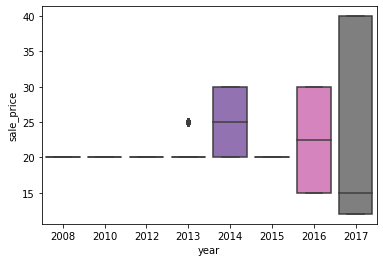

In [35]:
sns.boxplot(x='year', y='sale_price', data=data)
plt.show()

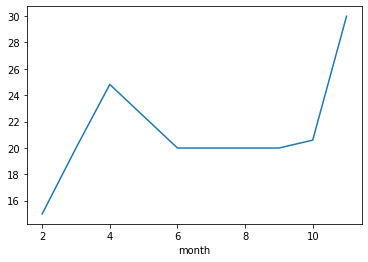

In [37]:
data.groupby('month').mean()['sale_price'].plot()
plt.show()

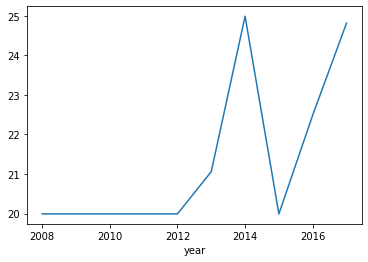

In [38]:
data.groupby('year').mean()['sale_price'].plot()
plt.show()

In [39]:
data.head()

,Name,date,sale_price,discounted_price,year,month
5,BlazBlue Centralfiction,2017-04-25,39.99,35.99,2017,4
7,The Long Dark,2014-09-22,19.99,9.99,2014,9
10,Batman : Arkham Knight,2015-06-23,19.99,7.99,2015,6
15,Batman: Arkham City - Game of the Year Edition,2012-09-07,19.99,4.99,2012,9
16,Space Engineers,2013-10-23,24.99,7.49,2013,10


In [40]:
dn = data.drop('Name', axis=1, inplace=True)

In [42]:
data.head()

,date,sale_price,discounted_price,year,month
5,2017-04-25,39.99,35.99,2017,4
7,2014-09-22,19.99,9.99,2014,9
10,2015-06-23,19.99,7.99,2015,6
15,2012-09-07,19.99,4.99,2012,9
16,2013-10-23,24.99,7.49,2013,10


In [46]:
data.head()

,sale_price,discounted_price,year,month
5,39.99,35.99,2017,4
7,19.99,9.99,2014,9
10,19.99,7.99,2015,6
15,19.99,4.99,2012,9
16,24.99,7.49,2013,10


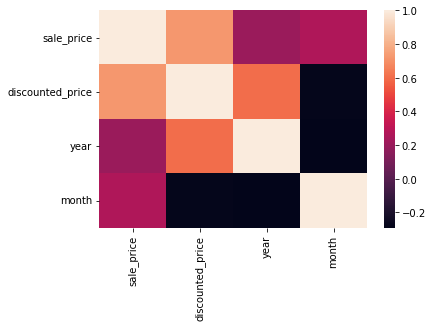

In [47]:
sns.heatmap(data.corr())
plt.show()

In [48]:
X = data.drop("sale_price", axis=1)
X.head()

,discounted_price,year,month
5,35.99,2017,4
7,9.99,2014,9
10,7.99,2015,6
15,4.99,2012,9
16,7.49,2013,10


In [49]:
y = data['sale_price']
y.head()

5     39.99
7     19.99
10    19.99
15    19.99
16    24.99
Name: sale_price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

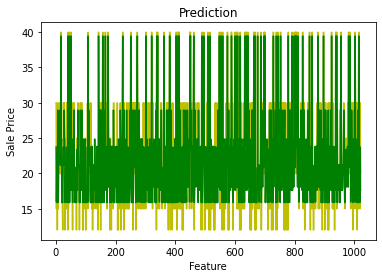

In [55]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='y',linestyle='-')
plt.plot(c,y_pred,color='g',linestyle='-')
plt.xlabel('Feature')
plt.ylabel('Sale Price')
plt.title('Prediction')
plt.show()

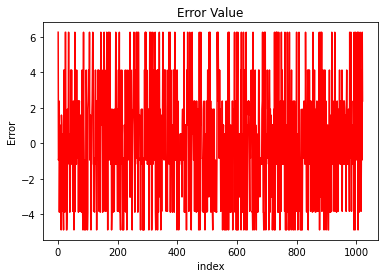

In [57]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='red',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [58]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 9.848789233003318
r square : 0.7954746138330149


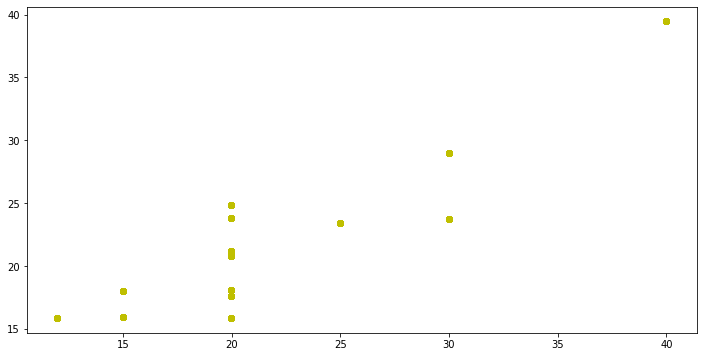

In [59]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='y',linestyle='-')
plt.show()

In [60]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 1495.850700008565
Coefficient of the line: [ 0.89357961 -0.74013548  1.07482396]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


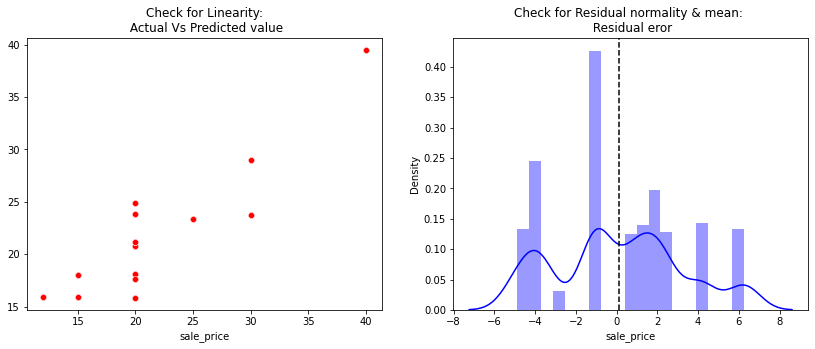

In [61]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

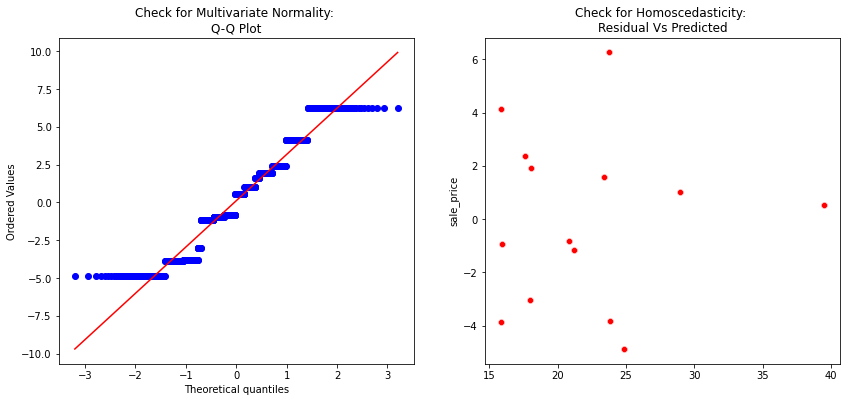

In [62]:

# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

Text(0, 0.5, 'y_pred')

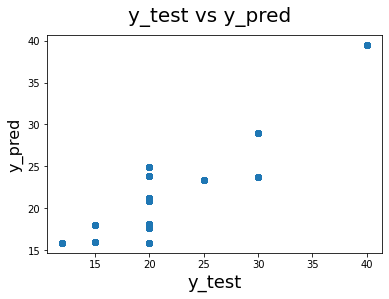

In [63]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   